# Loading in Residual Count Dataset

- each value shows gene expression via RNA sequencing

In [85]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv('data/RNAseqHarm/ROSMAP_Residualized_counts_(diagnosis-sex-age-death).tsv', delimiter="\t")
df1 = pd.read_csv('data/RNAseqHarm/RNAseq_Harmonization_ROSMAP_combined_metadata.csv')

In [87]:
df2 = df.copy()
df2 = df2.rename(columns={'feature':'index'})
df2 = df2.set_index('index').T
df2.reset_index(inplace=True)
df2.rename(columns={'index':'ID'}, inplace=True)

In [88]:
df2.shape

(2456, 18860)

In [89]:
df1['specimenID'].value_counts().head()

88_120417     2
470_120514    2
46_120416     2
460_120514    2
461_120514    2
Name: specimenID, dtype: int64

In [90]:
df1.columns

Index(['specimenID', 'platform', 'RIN', 'libraryBatch', 'sequencingBatch',
       'libraryPrep', 'libraryPreparationMethod', 'isStranded',
       'readStrandOrigin', 'runType', 'readLength', 'notes', 'individualID',
       'organ', 'tissue', 'BrodmannArea', 'nucleicAcidSource', 'isPostMortem',
       'assay', 'exclude', 'excludeReason', 'projid', 'Study', 'msex', 'educ',
       'race', 'spanish', 'apoe_genotype', 'age_at_visit_max',
       'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv'],
      dtype='object')

In [91]:
dfy = df1[[
       'specimenID', 'organ', 'tissue', 'BrodmannArea', 'nucleicAcidSource', 'isPostMortem',
       'assay', 'exclude', 'excludeReason', 'projid', 'Study', 'msex', 'educ',
       'race', 'spanish', 'apoe_genotype',
       'age_first_ad_dx', 'cts_mmse30_first_ad_dx',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx']]

In [92]:
dfy['tissue'].value_counts()

dorsolateral prefrontal cortex    1726
Head of caudate nucleus            749
posterior cingulate cortex         671
temporal cortex                    125
frontal cortex                     123
Name: tissue, dtype: int64

In [93]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   specimenID              3400 non-null   object 
 1   organ                   3394 non-null   object 
 2   tissue                  3394 non-null   object 
 3   BrodmannArea            248 non-null    float64
 4   nucleicAcidSource       3036 non-null   object 
 5   isPostMortem            248 non-null    object 
 6   assay                   3400 non-null   object 
 7   exclude                 68 non-null     object 
 8   excludeReason           68 non-null     object 
 9   projid                  3398 non-null   float64
 10  Study                   3398 non-null   object 
 11  msex                    3398 non-null   float64
 12  educ                    3398 non-null   float64
 13  race                    3398 non-null   float64
 14  spanish                 3398 non-null   

In [94]:
dfy = dfy[dfy['exclude'].isnull()]

In [95]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3332 entries, 0 to 3399
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   specimenID              3332 non-null   object 
 1   organ                   3326 non-null   object 
 2   tissue                  3326 non-null   object 
 3   BrodmannArea            248 non-null    float64
 4   nucleicAcidSource       2989 non-null   object 
 5   isPostMortem            248 non-null    object 
 6   assay                   3332 non-null   object 
 7   exclude                 0 non-null      object 
 8   excludeReason           0 non-null      object 
 9   projid                  3330 non-null   float64
 10  Study                   3330 non-null   object 
 11  msex                    3330 non-null   float64
 12  educ                    3330 non-null   float64
 13  race                    3330 non-null   float64
 14  spanish                 3330 non-null   

In [96]:
dfy = dfy.drop(columns=['exclude', 'excludeReason'])

In [97]:
dfy = dfy.drop(columns=['organ', 'BrodmannArea', 'age_first_ad_dx', 'cts_mmse30_first_ad_dx'])

In [98]:
dfy.columns

Index(['specimenID', 'tissue', 'nucleicAcidSource', 'isPostMortem', 'assay',
       'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx'],
      dtype='object')

In [99]:
dfy['nucleicAcidSource'].value_counts()

bulk cell    2989
Name: nucleicAcidSource, dtype: int64

In [100]:
dfy = dfy.drop(columns=['nucleicAcidSource', 'isPostMortem', 'assay', 'projid',
       'Study',
       'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc'])

In [101]:
dfy = dfy.drop(columns=['educ','race','spanish'])

In [102]:
dfy

,specimenID,tissue,msex,apoe_genotype,cogdx
0,Res_1,frontal cortex,0.0,33.0,1.0
1,Res_2,frontal cortex,0.0,33.0,1.0
2,Res_4,frontal cortex,0.0,33.0,1.0
3,Res_5,frontal cortex,0.0,33.0,1.0
4,Res_6,frontal cortex,0.0,23.0,1.0
...,...,...,...,...,...
3395,RISK_84_redo,posterior cingulate cortex,0.0,33.0,1.0
3396,RISK_9_rerun,dorsolateral prefrontal cortex,0.0,33.0,1.0
3397,RISK_93,dorsolateral prefrontal cortex,0.0,23.0,4.0
3398,RISK_94,posterior cingulate cortex,0.0,23.0,4.0


In [103]:
dfy['cogdx'].value_counts()

1.0    1163
4.0    1133
2.0     745
5.0     174
3.0      59
6.0      55
Name: cogdx, dtype: int64

In [104]:
dfy['HasAlzheimer'] = dfy['cogdx'].apply(lambda x: 1 if x in [4, 5] else 0 if x == 1 else np.nan)

In [105]:
dfy.head(1)

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer
0,Res_1,frontal cortex,0.0,33.0,1.0,0.0


In [106]:
dfy.tail(40)

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer
3360,RISK_327,dorsolateral prefrontal cortex,1.0,23.0,2.0,NaN
3361,RISK_334,dorsolateral prefrontal cortex,1.0,34.0,1.0,0.0
3362,RISK_335,dorsolateral prefrontal cortex,0.0,33.0,1.0,0.0
3363,RISK_339,dorsolateral prefrontal cortex,1.0,34.0,5.0,1.0
3364,RISK_342,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0
3365,RISK_345,dorsolateral prefrontal cortex,1.0,34.0,4.0,1.0
3366,RISK_346,dorsolateral prefrontal cortex,0.0,33.0,4.0,1.0
3367,RISK_351,dorsolateral prefrontal cortex,0.0,33.0,2.0,NaN
3368,RISK_372,dorsolateral prefrontal cortex,0.0,44.0,4.0,1.0
3369,RISK_377,dorsolateral prefrontal cortex,0.0,33.0,4.0,1.0


In [107]:
dfx = pd.merge(dfy, df2, left_on='specimenID', right_on='ID', how='inner')

In [108]:
dfx['specimenID'].value_counts()

492_120515               2
567_120521               2
560_120517               2
561_120517               2
562_120517               2
                        ..
Sample_R5407536-AC       1
Sample_R5407536-DLPFC    1
Sample_R1073074-AC       1
Sample_R1073074-PCC      1
RISK_97                  1
Name: specimenID, Length: 2456, dtype: int64

In [109]:
dfx = dfx.drop_duplicates(subset='specimenID')

In [110]:
dfx.shape

(2456, 18866)

In [111]:
dfx['specimenID'].value_counts()

492_120515             1
Sample_R9253870-PCC    1
Sample_R2871843-PCC    1
Sample_R8615683-AC     1
Sample_R8266864-AC     1
                      ..
Sample_R1214999-PCC    1
Sample_R1214999-AC     1
Sample_R3328867-AC     1
Sample_R2752714-PCC    1
RISK_97                1
Name: specimenID, Length: 2456, dtype: int64

In [112]:
dfx.head()

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
0,492_120515,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0,492_120515,-0.432004,-0.062111,0.112960,...,-0.048852,-0.073300,-0.161494,-0.700259,3.569068,-0.337891,0.142195,0.514537,0.088058,0.132191
2,01_120405,dorsolateral prefrontal cortex,0.0,33.0,6.0,NaN,01_120405,-0.355546,-0.345490,-0.504667,...,-0.692533,0.098602,0.687370,-0.520883,-0.849084,0.359026,-0.301622,0.568921,1.465695,-1.344327
4,02_120405,dorsolateral prefrontal cortex,0.0,24.0,4.0,1.0,02_120405,-0.816047,0.236233,0.276747,...,1.331595,-0.303728,0.667944,-1.550739,-1.815264,0.019518,0.368153,0.245726,-0.158405,-0.002209
6,03_120405,dorsolateral prefrontal cortex,0.0,33.0,1.0,0.0,03_120405,-0.958931,0.000739,0.548188,...,0.283749,0.430266,0.033650,-0.445345,-1.337655,0.203595,1.017957,-0.148710,1.903356,0.858265
8,04_120405,dorsolateral prefrontal cortex,0.0,23.0,1.0,0.0,04_120405,-0.115041,0.200627,0.227565,...,-0.134851,0.174122,-0.195698,-0.652698,-1.696429,0.320636,-0.060940,-0.429307,-0.240233,-0.394856


In [113]:
dfx = dfx.dropna()

In [114]:
dfx.shape

(1818, 18866)

In [115]:
dfx.head()

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
0,492_120515,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0,492_120515,-0.432004,-0.062111,0.112960,...,-0.048852,-0.073300,-0.161494,-0.700259,3.569068,-0.337891,0.142195,0.514537,0.088058,0.132191
4,02_120405,dorsolateral prefrontal cortex,0.0,24.0,4.0,1.0,02_120405,-0.816047,0.236233,0.276747,...,1.331595,-0.303728,0.667944,-1.550739,-1.815264,0.019518,0.368153,0.245726,-0.158405,-0.002209
6,03_120405,dorsolateral prefrontal cortex,0.0,33.0,1.0,0.0,03_120405,-0.958931,0.000739,0.548188,...,0.283749,0.430266,0.033650,-0.445345,-1.337655,0.203595,1.017957,-0.148710,1.903356,0.858265
8,04_120405,dorsolateral prefrontal cortex,0.0,23.0,1.0,0.0,04_120405,-0.115041,0.200627,0.227565,...,-0.134851,0.174122,-0.195698,-0.652698,-1.696429,0.320636,-0.060940,-0.429307,-0.240233,-0.394856
12,07_120410,dorsolateral prefrontal cortex,1.0,33.0,1.0,0.0,07_120410,-1.026603,0.024091,-0.010076,...,-0.063903,0.441658,0.301135,-0.254509,3.724301,0.703543,0.581852,-0.280216,1.505367,-0.042449


In [116]:
dfx['tissue'].value_counts()

dorsolateral prefrontal cortex    817
Head of caudate nucleus           517
posterior cingulate cortex        484
Name: tissue, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [119]:
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [121]:
from tqdm import tqdm

In [122]:
dfx.head(1)

,specimenID,tissue,msex,apoe_genotype,cogdx,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
0,492_120515,dorsolateral prefrontal cortex,1.0,33.0,4.0,1.0,492_120515,-0.432004,-0.062111,0.11296,...,-0.048852,-0.0733,-0.161494,-0.700259,3.569068,-0.337891,0.142195,0.514537,0.088058,0.132191


In [78]:
dfx.to_csv('dfxROSMAP.csv', index=False) 

In [123]:
X = dfx.drop(['specimenID', 'cogdx', 'HasAlzheimer', 'ID'], axis=1)  
y = dfx['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [124]:
print(X.columns)

Index(['tissue', 'msex', 'apoe_genotype', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036',
       ...
       'ENSG00000288030', 'ENSG00000288033', 'ENSG00000288044',
       'ENSG00000288048', 'ENSG00000288049', 'ENSG00000288061',
       'ENSG00000288062', 'ENSG00000288075', 'ENSG00000288107',
       'ENSG00000288108'],
      dtype='object', length=18862)


In [125]:
all_floats = ((X.dtypes == 'float64') | (X.dtypes == 'float32')).all()
print(all_floats)

False


In [126]:
all_floats = ((X[numerical_cols].dtypes == 'float64') | (X[numerical_cols].dtypes == 'float32')).all()
print(all_floats)

True


In [127]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)


tissue    object
dtype: object


In [128]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

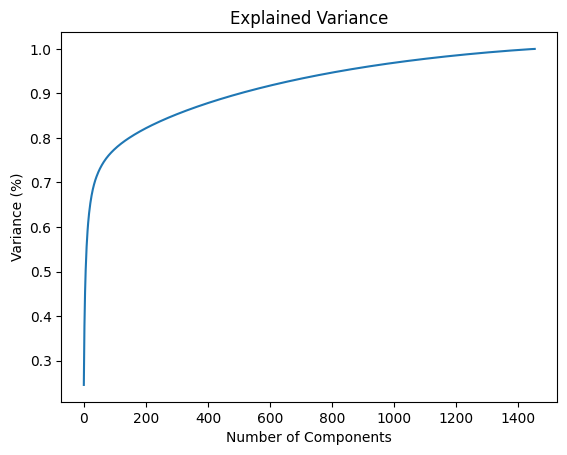

In [130]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/en

<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

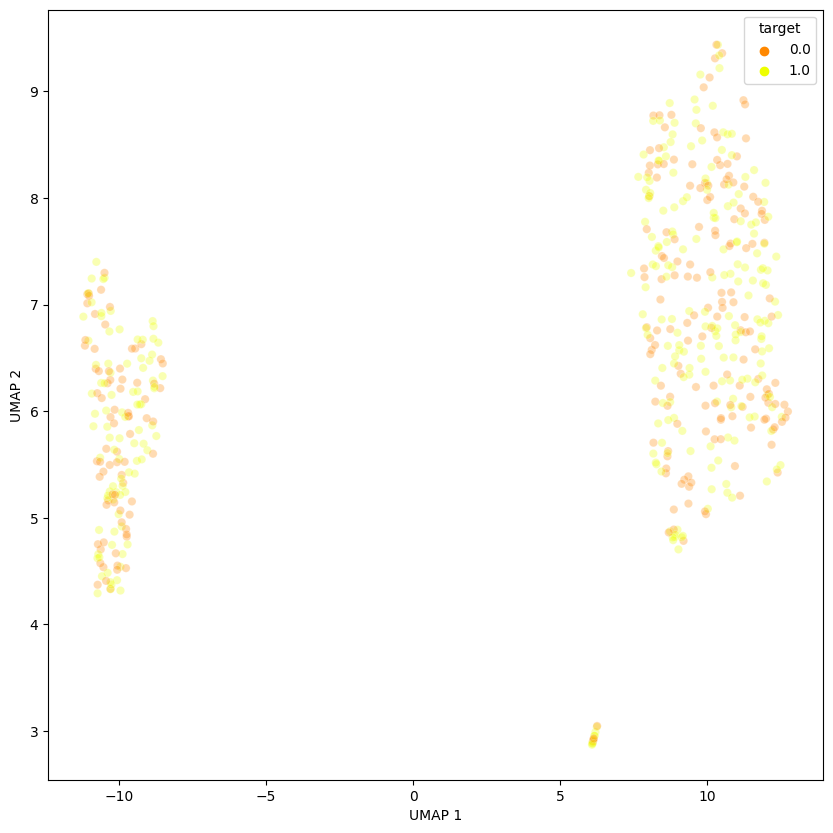

In [399]:
from umap import UMAP
import seaborn as sns

# Fit UMAP on your preprocessed data
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Add target variable for coloring
umap_df['target'] = y_train

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="target",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)

# Now to Modeling!

In [205]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)



In [206]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66       177
         1.0       0.68      0.71      0.69       187

    accuracy                           0.68       364
   macro avg       0.68      0.68      0.68       364
weighted avg       0.68      0.68      0.68       364

[[114  63]
 [ 54 133]]


In [398]:
X.shape

(1818, 18862)

In [131]:
model2 = LogisticRegression(max_iter=1000)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model2)
                       ])


In [132]:

pca = PCA(n_components=700) # Here n_components is the number of components to keep.
                           # You need to specify this parameter based on your data and requirements.

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', model2)
                       ])

In [1]:
umap = UMAP(n_components=2) # Again, choose n_components based on your requirements.

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('umap', umap),
                        ('model', model2)
                       ])


NameError: name 'UMAP' is not defined

In [423]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.32%


In [215]:

print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       177
         1.0       0.88      0.90      0.89       187

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

[[153  24]
 [ 19 168]]


In [216]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [219]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.90%


In [221]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       177
         1.0       0.73      0.79      0.76       187

    accuracy                           0.74       364
   macro avg       0.74      0.74      0.74       364
weighted avg       0.74      0.74      0.74       364

[[121  56]
 [ 39 148]]


In [230]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [239]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(18864,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [247]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [248]:
pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model5)
                       ])


In [249]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/50


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2023-07-28 12:42:58.741962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


146/146 - 2s - loss: 0.8985 - acc: 0.5557 - 2s/epoch - 17ms/step
Epoch 2/50
146/146 - 2s - loss: 0.7697 - acc: 0.5922 - 2s/epoch - 11ms/step
Epoch 3/50
146/146 - 2s - loss: 0.6908 - acc: 0.6121 - 2s/epoch - 11ms/step
Epoch 4/50
146/146 - 2s - loss: 0.6329 - acc: 0.6575 - 2s/epoch - 11ms/step
Epoch 5/50
146/146 - 2s - loss: 0.5985 - acc: 0.6898 - 2s/epoch - 11ms/step
Epoch 6/50
146/146 - 2s - loss: 0.5482 - acc: 0.7276 - 2s/epoch - 11ms/step
Epoch 7/50
146/146 - 2s - loss: 0.5073 - acc: 0.7524 - 2s/epoch - 12ms/step
Epoch 8/50
146/146 - 2s - loss: 0.4445 - acc: 0.7854 - 2s/epoch - 11ms/step
Epoch 9/50
146/146 - 2s - loss: 0.4142 - acc: 0.8116 - 2s/epoch - 11ms/step
Epoch 10/50
146/146 - 2s - loss: 0.3566 - acc: 0.8439 - 2s/epoch - 11ms/step
Epoch 11/50
146/146 - 2s - loss: 0.2738 - acc: 0.8838 - 2s/epoch - 10ms/step
Epoch 12/50
146/146 - 2s - loss: 0.2544 - acc: 0.9010 - 2s/epoch - 10ms/step
Epoch 13/50
146/146 - 1s - loss: 0.2638 - acc: 0.8851 - 1s/epoch - 10ms/step
Epoch 14/50
146/146

2023-07-28 12:44:21.105309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [250]:
y_pred_proba = pipe5.predict(X_test)
y_pred5 = np.where(y_pred_proba > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


37/37 - 0s - 131ms/epoch - 4ms/step
Accuracy: 79.95%


In [252]:

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       177
         1.0       0.83      0.76      0.80       187

    accuracy                           0.80       364
   macro avg       0.80      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364

[[148  29]
 [ 44 143]]


In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV] END model__C=0.001, model__penalty=l1, model__solver=newton-cg; total time=   1.8s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.1s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   3.6s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=  11.4s
[CV] END model__C=0.001, model__penalty=l2, model__solver=sag; total time= 1.8min
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=newton-cg; total time=   0.5s
[CV] END model__C=0.001, model__pe

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.4s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=lbfgs; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=liblinear; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__solver=sag; total time=   0.5s
[CV] END model__C=0.001, model__penalty=elasticnet, model__sol

[CV] END model__C=0.001, model__penalty=l1, model__solver=lbfgs; total time=   1.7s
[CV] END model__C=0.001, model__penalty=l1, model__solver=sag; total time=   2.1s
[CV] END model__C=0.001, model__penalty=l1, model__solver=saga; total time=   3.4s
[CV] END model__C=0.001, model__penalty=l2, model__solver=newton-cg; total time=  11.9s
[CV] END model__C=0.001, model__penalty=l2, model__solver=saga; total time= 4.9min
[CV] END model__C=0.01, model__penalty=l2, model__solver=sag; total time= 1.1min
[CV] END model__C=0.01, model__penalty=l2, model__solver=saga; total time= 1.8min
[CV] END model__C=0.1, model__penalty=l1, model__solver=saga; total time=13.3min
[CV] END ...model__C=1, model__penalty=l2, model__solver=sag; total time= 4.3min
[CV] END ..model__C=1, model__penalty=l2, model__solver=saga; total time= 5.6min
[CV] END .model__C=10, model__penalty=l1, model__solver=saga; total time=13.7min
[CV] END model__C=100, model__penalty=l2, model__solver=liblinear; total time=  10.4s
[CV] EN

/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8466003080933759
Best score without penalty: 0.8287237824386775


In [284]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)

Best parameters with penalty: {'model__C': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'newton-cg'}
Best score with penalty: 0.8466003080933759
Best score without penalty: 0.8287237824386775


In [134]:
# Get the best parameters from the grid search
best_params = {'model__C': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}

# Adjust the parameters by removing 'model__'
best_params_adjusted = {k.replace('model__', ''): v for k, v in best_params.items()}

# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression(C=best_params_adjusted['C'], 
                                penalty=best_params_adjusted['penalty'], 
                                solver=best_params_adjusted['solver'], 
                                max_iter=1000)

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


Accuracy: 88.19%
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       177
         1.0       0.88      0.89      0.89       187

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

[[155  22]
 [ 21 166]]


In [135]:
# Get the one-hot encoder from the preprocessor
onehot = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Get the coefficients from the model
coefficients = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series = pd.Series(coefficients, index=feature_names)

# Get the absolute values to consider the magnitude of the coefficients
abs_coefs = coef_series.abs()

# Sort the features by the absolute values of their coefficients in descending order
sorted_features = abs_coefs.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ENSG00000286261    0.204835
ENSG00000261701    0.192730
ENSG00000167244    0.191975
ENSG00000286924    0.185445
ENSG00000204961    0.185394
ENSG00000170122    0.185206
ENSG00000138092    0.184946
ENSG00000203666    0.184593
ENSG00000215030    0.184001
ENSG00000242375    0.183209
ENSG00000228775    0.182834
ENSG00000136108    0.181238
ENSG00000147813    0.180659
ENSG00000286895    0.177987
ENSG00000235833    0.175479
ENSG00000043514    0.174415
ENSG00000225178    0.174319
ENSG00000124257    0.174068
ENSG00000221882    0.173111
ENSG00000154608    0.172392
ENSG00000287978    0.170796
ENSG00000189306    0.166449
ENSG00000283913    0.166235
ENSG00000243422    0.165626
ENSG00000175482    0.164724
ENSG00000105085    0.164104
ENSG00000104980    0.163991
ENSG00000234171    0.163694
ENSG00000013573    0.163086
ENSG00000233230    0.162992
ENSG00000140955    0.161030
ENSG00000266921    0.160568
ENSG00000230606    0.160369
ENSG00000244398    0.159714
ENSG00000183508    0.159510
ENSG00000204172    0

In [136]:
# Get the one-hot encoder from the preprocessor
onehot1 = pipe7.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features1 = onehot1.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features1 = numerical_cols

# Combine original and one-hot encoded feature names
feature_names1 = np.concatenate([original_features1, onehot_features1])

# Get the coefficients from the model
coefficients1 = pipe7.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series1 = pd.Series(coefficients1, index=feature_names)

# Sort the features by their coefficients in ascending order. The features with the most negative coefficients will come first.
sorted_features1 = coef_series1.sort_values(ascending=False)

# Print the top n features with the most negative coefficients
n = 50  # change this to the number of top features you want to print
print(sorted_features1[:n])


ENSG00000286261    0.204835
ENSG00000261701    0.192730
ENSG00000167244    0.191975
ENSG00000286924    0.185445
ENSG00000138092    0.184946
ENSG00000203666    0.184593
ENSG00000215030    0.184001
ENSG00000228775    0.182834
ENSG00000136108    0.181238
ENSG00000154608    0.172392
ENSG00000189306    0.166449
ENSG00000104980    0.163991
ENSG00000013573    0.163086
ENSG00000266921    0.160568
ENSG00000244398    0.159714
ENSG00000204172    0.159147
ENSG00000225792    0.158555
ENSG00000183793    0.158502
ENSG00000279168    0.157035
ENSG00000283355    0.156910
ENSG00000233396    0.156615
ENSG00000168743    0.156590
ENSG00000164989    0.155355
ENSG00000118004    0.154869
ENSG00000267390    0.154314
ENSG00000277494    0.151544
ENSG00000055732    0.151026
ENSG00000230409    0.149068
ENSG00000204778    0.147719
ENSG00000107371    0.146697
ENSG00000237438    0.146683
ENSG00000286532    0.146515
ENSG00000272674    0.146386
ENSG00000228506    0.145481
ENSG00000057657    0.145149
ENSG00000161217    0

In [137]:
ETG = pd.read_csv('data/RNAseqHarm/ROSMAP_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [138]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [139]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [140]:
ETG.head()

,ensembl_gene_id,hgnc_symbol
0,ENSG00000229807,XIST
1,ENSG00000012223,LTF
2,ENSG00000197261,C6orf141
3,ENSG00000165370,GPR101
4,ENSG00000165409,TSHR


In [141]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [142]:
print(sorted_features.head())
print(sorted_features.tail())

ENSG00000286261    0.204835
ENSG00000261701    0.192730
ENSG00000167244    0.191975
ENSG00000286924    0.185445
ENSG00000204961    0.185394
dtype: float64
ENSG00000271344    0.000011
ENSG00000136169    0.000009
ENSG00000240849    0.000006
ENSG00000131373    0.000005
ENSG00000105755    0.000002
dtype: float64


In [143]:
# Reset the index of sorted_features
sorted_features = sorted_features.reset_index()

In [144]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head(50)


In [145]:
print(ETG['ensembl_gene_id'].nunique())
print(ETG.shape[0])


18852
18852


In [147]:
X.shape

(1818, 18862)

In [146]:
top_features

hgnc_symbol
AC022137.3     0.204835
HPR            0.192730
IGF2           0.191975
AL139815.1     0.185445
PCDHA9         0.185394
FOXD4          0.185206
CENPO          0.184946
EFCAB2         0.184593
RPL13P12       0.184001
AL590705.3     0.183209
WEE2-AS1       0.182834
CKAP2          0.181238
NAPRT          0.180659
AC092745.5     0.177987
AC017099.1     0.175479
TRIT1          0.174415
RPSAP58        0.174319
NEURL2         0.174068
AC087498.2     0.173111
CEP170P1       0.172392
AC245407.2     0.170796
RRP7A          0.166449
AL512662.2     0.166235
RPL23AP49      0.165626
POLD4          0.164724
MED26          0.164104
TIMM44         0.163991
RNASEH1-AS1    0.163694
DDX11          0.163086
AC079807.1     0.162992
ADAD2          0.161030
AC006213.1     0.160568
AC092683.1     0.160369
AC116533.1     0.159714
TENT5C         0.159510
AGAP9          0.159147
MT-CO2         0.159130
AC004540.2     0.158555
NPIPA5         0.158502
AC105052.4     0.157035
AC074194.2     0.156910
LINC

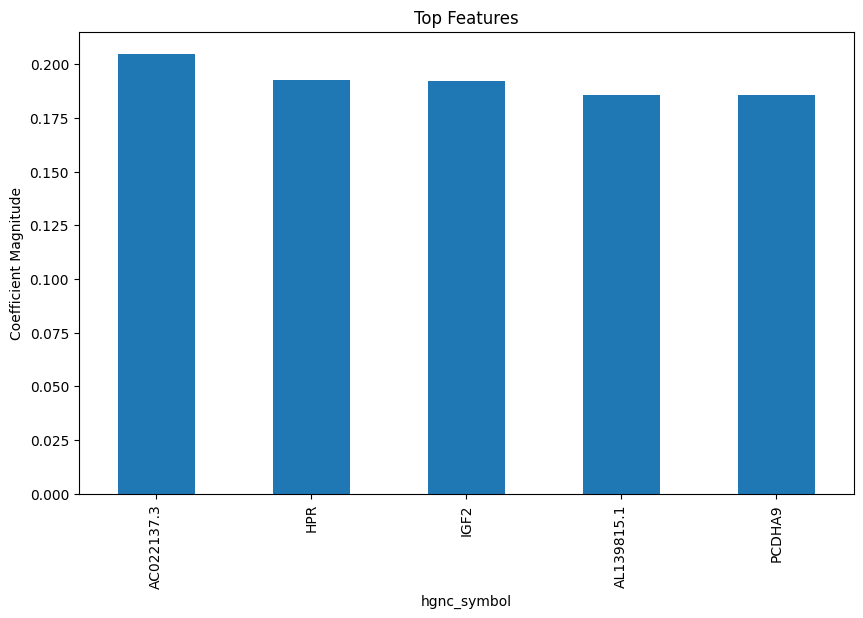

In [345]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


In [357]:
# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list
top_features1 = top_features

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features1[gene] = coef  # add the gene and its coefficient to the top_features


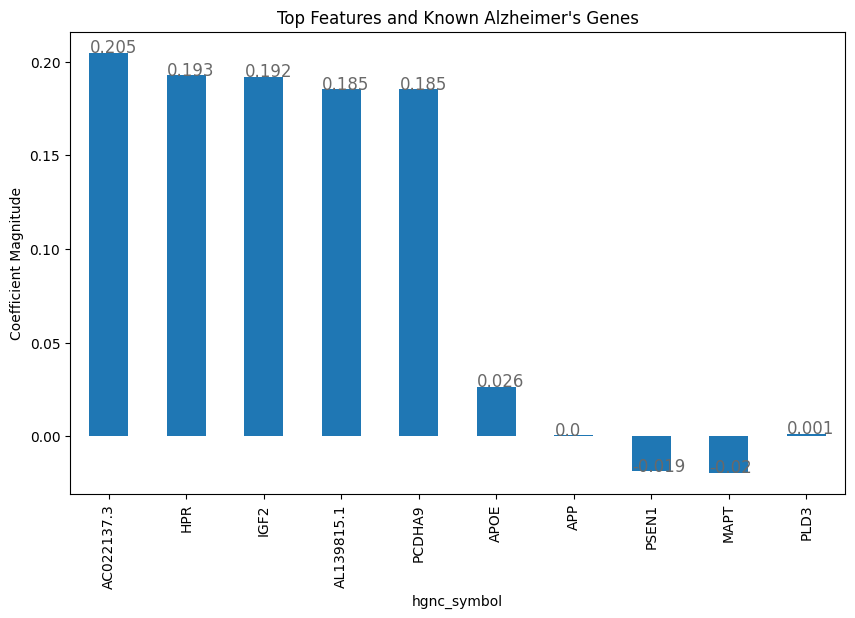

In [359]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # adjust the size of the figure as needed
top1_features.plot(kind='bar', ax=ax)
plt.title('Top Features and Known Alzheimer\'s Genes')
plt.ylabel('Coefficient Magnitude')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    
plt.show()


In [382]:
sorted_features1_df = sorted_features1.reset_index()

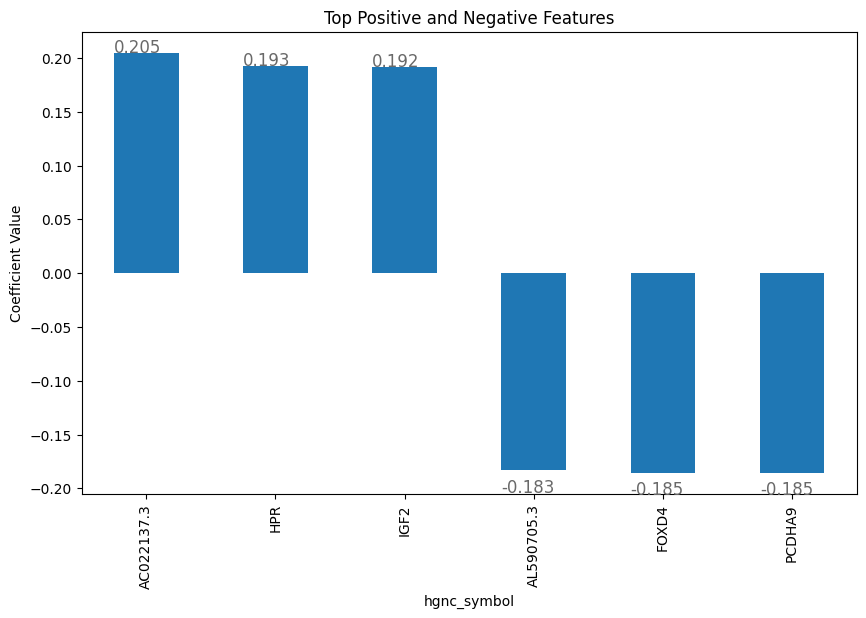

In [390]:
# Convert Series to DataFrame
coef_series_sorted_df = coef_series_sorted.reset_index()

# Rename the columns of sorted_features_df for the merge operation
coef_series_sorted_df.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df1 = pd.merge(coef_series_sorted_df, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df1.set_index('hgnc_symbol', inplace=True)

# Get the top n positive features and top n negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 6))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive and Negative Features')
plt.ylabel('Coefficient Value')
plt.show()


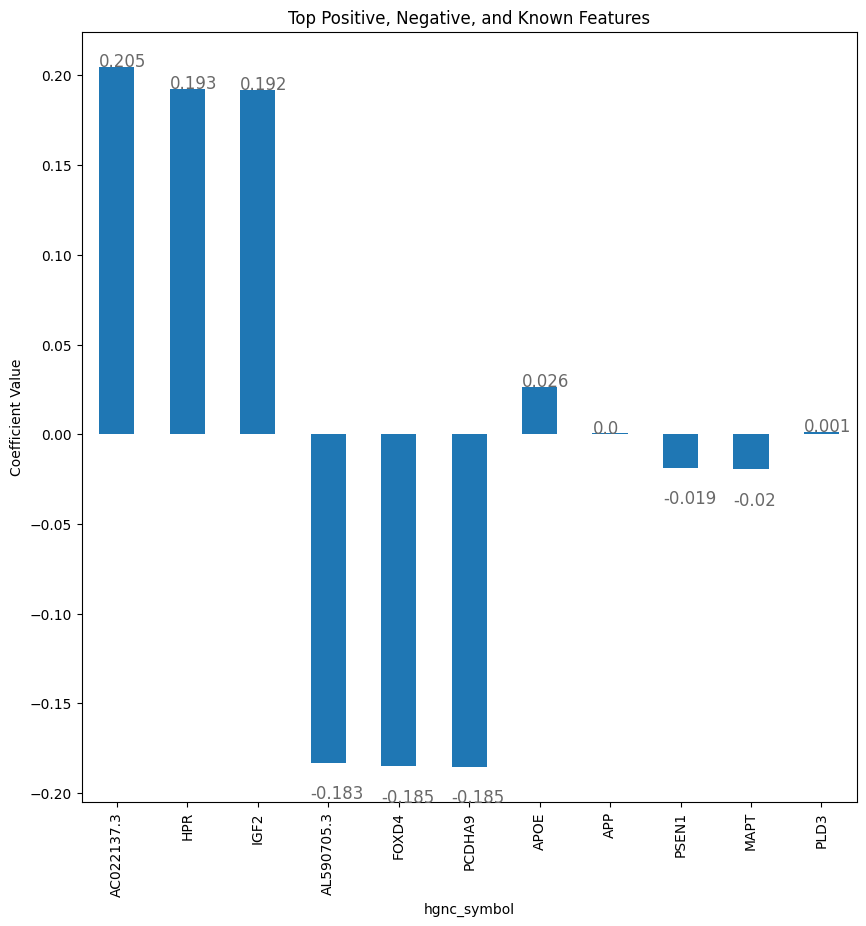

In [396]:
# Get the top 2 positive features and top 2 negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features2[gene] = coef  # add the gene and its coefficient to the top_features2

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 10))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive, Negative, and Known Features')
plt.ylabel('Coefficient Value')
plt.show()


In [374]:
ls1 = df.columns.tolist()

In [376]:
print(ls1)

['feature', '510_120515', '207_120424', '81_120417', '649_120529', '487_120515', '182_120424', '193_120424', '694_120605', '366_120502', '52_120416', '522_120515', '493_120515', '602_120523', '634_120524', '653_120529', '391_120503', '453_120507', '371_120502', '414_120503', '102_120418', '641_120524', '111_120418', '600_120523', '188_120424', '321_120501', '547_120516', '130_120419', '305_120430', '668_120530', '555_120517', '679_120604', '318_120501', '112_120418', '689_120604', '418_120507', '589_120522', '216_120425', '654_120529', '619_120524', '358_120502', '312_120430', '624_120524', '576_120521', '410_120503', '274_120430', '408_120503', '76_120417', '340_120501', '288_120430', '222_120425', '234_120425', '578_120521', '46_120416', '477_120514', '683_120604', '39_120416', '309_120430', '121_120418', '405_120503', '482_120514', '607_120523', '565_120517', '120_120418', '507_120515', '260_120426', '273_120430', '524_120515', '556_120517', '113_120418', '160_120423', '698_120605',

In [149]:
import seaborn as sns

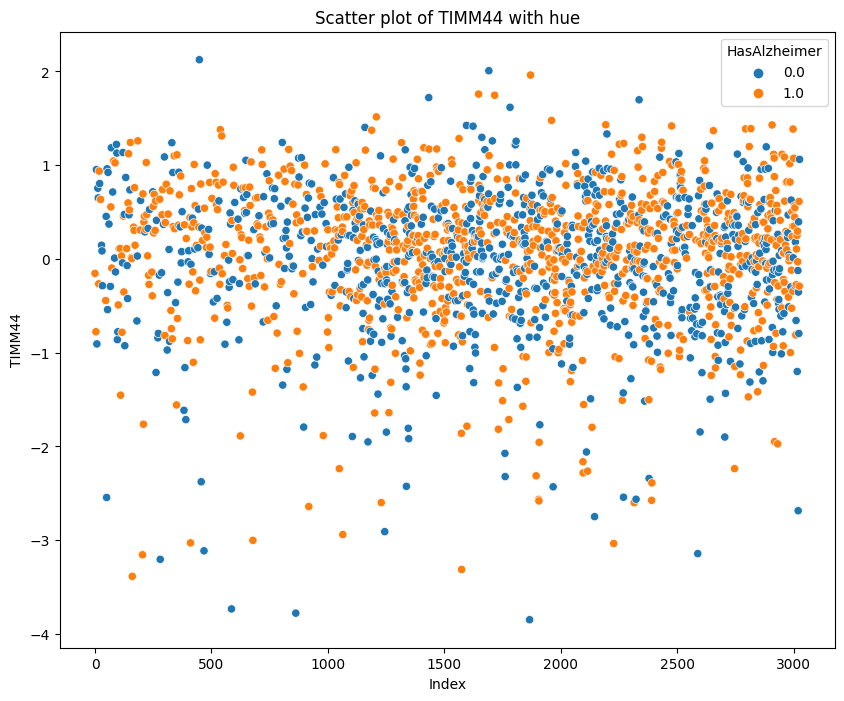

In [154]:
# Scatter plot with hue
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dfx, x=dfx.index, y='ENSG00000286261', hue='HasAlzheimer')

plt.xlabel('Index')
plt.ylabel('TIMM44')
plt.title('Scatter plot of TIMM44 with hue')
plt.show()